[-0.020000000000000004,
 -0.012500000000000002,
 -0.0080000000000000019,
 -0.005000000000000001,
 -0.0028571428571428584,
 -0.0012500000000000002,
 0.0,
 0.001,
 0.001818181818181818,
 0.0025000000000000005,
 0.0030769230769230778,
 0.0035714285714285718,
 0.004000000000000001,
 0.0043750000000000004,
 0.0047058823529411769,
 0.005000000000000001,
 0.0052631578947368437,
 0.0055000000000000014,
 0.0057142857142857151,
 0.0059090909090909098,
 0.0060869565217391321,
 0.0062500000000000012,
 0.0064000000000000012,
 0.0065384615384615399,
 0.0066666666666666688,
 0.0067857142857142873,
 0.0068965517241379327,
 0.007000000000000001,
 0.0070967741935483893,
 0.0071875000000000012,
 0.0072727272727272745,
 0.0073529411764705899,
 0.0074285714285714302,
 0.0075000000000000015,
 0.0075675675675675692,
 0.0076315789473684233,
 0.0076923076923076927,
 0.0077500000000000017,
 0.0078048780487804895,
 0.0078571428571428577,
 0.0079069767441860474,
 0.0079545454545454555,
 0.0080000000000000019,
 0.

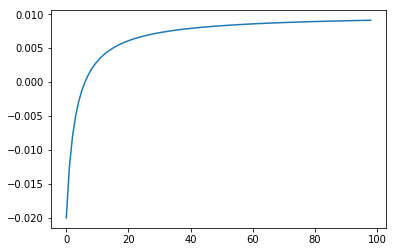

In [59]:
import numpy as np
import matplotlib.pyplot as plt
errs=[]
def E(d,sig,N):
    return (sig**2)*(1-(d +1)/N)

errs=[E(8,0.1,N) for N in np.arange(2,10000)]
plt.plot(errs[1:100])
errs[1:100]

In [54]:

def derivative(u,v):
    d1=2*(u*np.exp(v)-2*v*np.exp(-u))*(np.exp(v)+2*v*np.exp(-u))
    d2=2*(u*np.exp(v)-2*v*np.exp(-u))*(u*np.exp(v)-2*np.exp(-u))
    return d1,d2
def err(u,v):
    err=(u*np.exp(v)-2*v*np.exp(-u))**2
    return err
initpoint=[1,1]
errors=[]
point=[1,1]
# errors.append(err(point[0],point[1]))
ni=0.1
for i in range(100):
    a,b=derivative(point[0],point[1])
    point=[point[0]-ni*a,point[1]-ni*b]
    curr_error=err(point[0],point[1])
    errors.append(curr_error)
    if curr_error<10**-14:
        print(i)
        print(point)
        
        break
    
#     point=[-ni]
    

9
[0.044736290397782069, 0.023958714099141746]


In [36]:
import numpy as np
def derivative(u,v):
    d1=2*(u*np.exp(v)-2*v*np.exp(-u))*(np.exp(v)+2*v*np.exp(-u))
    d2=2*(u*np.exp(v)-2*v*np.exp(-u))*(u*np.exp(v)-2*np.exp(-u))
    return d1,d2
def err(u,v):
    err=(u*np.exp(v)-2*v*np.exp(-u))**2
    return err
initpoint=[1,1]
errors=[]
point=[1,1]
# errors.append(err(point[0],point[1]))
ni=0.1
for i in range(15):
    a,b=derivative(point[0],point[1])
    point=[point[0]-ni*a,point[1]]
    a,b=derivative(point[0],point[1])
    point=[point[0],point[1]-ni*b]
    curr_error=err(point[0],point[1])
    errors.append(curr_error)
    if curr_error<10**-14:
        print(i)
        print(point)
        
        break
print(i)
print(point)  
print(errors[-1])
#     point=[-ni]

14
[6.2970758993051703, -2.852306954077811]
0.139813791996


In [50]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
def sign(x):
    if x>0:
        return 1
    elif x==0:
        return 0
    elif x<0:
        return -1


#         plt.plot((xx1,xx2),(yy1,yy2))
#         plt.plot((x1,x2),(y1,y2),marker='o')
#         plt.xlim(-1,1)
#         plt.ylim(-1,1)

def targetf(x,y):
    if y>m*x+b:
        return 1
    else: 
        return -1
#     def classify(self,point):
#         outsum=0
#         out=np.zeros(len(point))
#         for i in range(len(point)):
#             out[i]=self.w[i]*point[i]
#             outsum+=out[i]
#         outsum=outsum+self.w0
#         return sign(outsum)
def deriv(w,X,y):
    a=(np.exp(-y*np.dot(w,X))*np.dot(-y,X))/(1+np.exp(-y*np.dot(w,X)))
    return a

# print(deriv([1,2,3],[1,2,3],1))
# targetf(.2,.2)
outerrs=[]
intrcnts=[]
for l in range(100):
    q=rn.Random()  
    x1,y1 =q.random()*2-1 ,q.random()*2-1
    x2,y2 =q.random()*2-1 ,q.random()*2-1
    m=(y2-y1)/(x2-x1)
    b=y2-(m*x2)
    xx1,yy1=-1,m*-1+b
    xx2,yy2=1,m*1+b
    npts=100
    ni=0.01
    points=[]
    outputs=[]
    points=[[1,rn.random()*2-1,rn.random()*2-1] for x in range(npts) ]
    outputs=[targetf(x,y) for z,x,y in points]
    W=[0,0,0]
    stop=0
    iners=[]
    errors=[]
    intrcnt=0
    while not(stop):
        samp=rn.sample(range(npts),npts)
        iner=0
        Wbegin=W
        for k in samp:
            point=points[k]
            y=outputs[k]

            de=deriv(W,point,y)
    #        !!! np.linalg.norm(de)
            W=np.add(W,-ni*de)
            error=np.log(1+np.exp(-y*np.dot(W,point)))
            errors.append(error)
            iner+=(error/100)
        diffvec=np.add(Wbegin,np.dot(W,-1))
        deltaw=np.linalg.norm(diffvec)
        iners.append(iner)
        intrcnt+=1    
        if deltaw<0.01:
            stop=1
    intrcnts.append(intrcnt)
    nptstest=1000
    newpoints=[[1,rn.random()*2-1,rn.random()*2-1] for x in range(nptstest) ]
    newoutputs=[targetf(x,y) for z,x,y in newpoints]
    outerr=0
    for i in range(nptstest):
        point=newpoints[i]
        y=newoutputs[i]
        outerr+=np.log(1+np.exp(-y*np.dot(W,point)))
    outerr/=nptstest
    outerrs.append(outerr)


#     plt.figure(2) 
#     plt.subplot(1,2,1)
#     for i in range(len(points)):
#         y=(np.dot(points[i],W))
#         if y>0:
#             plt.scatter(points[i][1],points[i][2],marker='o')
#         else:
#             plt.scatter(points[i][1],points[i][2],marker='x')
#     plt.subplot(1,2,2)       
#     for i in range(len(points)):
#         if outputs[i]==1:
#             plt.scatter(points[i][1],points[i][2],marker='o')
#         else:
#             plt.scatter(points[i][1],points[i][2],marker='x')

    # print(np.average(result_ints)   )
    # print(np.average(agree)   )        
    # print(np.average(verify)   ) 
print(outerrs)

0.0914095828654
0.0999238143793
0.108474949766
0.104605802501
0.0913613567731
0.103596335873
0.097286638371
0.110651440398
0.0905870104496
0.103540022084
0.104505789175
0.111655945685
0.0896950753488
0.10089474609
0.0940015142438
0.0999487505667
0.0998097313153
0.117038695364
0.0950868615197
0.109489445472
0.104369380471
0.0991659962524
0.0744085030575
0.109810809765
0.0974995459371
0.0917651723153
0.0918842636462
0.090627191399
0.102437410552
0.0822896057572
0.135602523782
0.105838398904
0.0824580045006
0.0931532075669
0.100541051951
0.0724987310654
0.0903752422651
0.101356325482
0.0874757103373
0.0804472699899
0.107329104332
0.0903858585483
0.0994761818281
0.11858762481
0.100697280051
0.086624163047
0.115177266973
0.0958825211164
0.0973781732059
0.0907984714969
0.0880726726261
0.107935335371
0.0757051884924
0.0928637008879
0.0839795001551
0.115377779485
0.107215703367
0.115482522598
0.1024773915
0.104088410034
0.102572359425
0.123836652207
0.0969872740004
0.0959146647651
0.0860130739

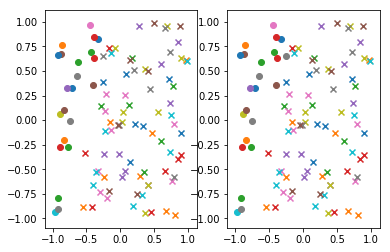

In [40]:
plt.figure(2) 
plt.subplot(1,2,1)
for i in range(len(points)):
    y=(np.dot(points[i],W))
    if y>0:
        plt.scatter(points[i][1],points[i][2],marker='o')
    else:
        plt.scatter(points[i][1],points[i][2],marker='x')
plt.subplot(1,2,2)       
for i in range(len(points)):
    if outputs[i]==1:
        plt.scatter(points[i][1],points[i][2],marker='o')
    else:
        plt.scatter(points[i][1],points[i][2],marker='x')

In [69]:
import random as rn
q=rn.sample([1,2,3,4],4)
for k in q:
    print (k)

4
1
3
2


In [27]:
diffvec=np.add([1,2,3],np.dot([1,2,3.5],-1))

In [51]:
np.average(intrcnts)

339.94999999999999

array([   2,    3,    4, ..., 9997, 9998, 9999])